# Bank Marketing Dataset-UCI Machine learning reporsitory

In [19]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import time
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
data=data[~data.duplicated()] #removing duplicate rows

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

### Pre-processing 1

Label encoding of Education and One-hot encoding of categorical fields

In [6]:
class Feature_engineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        return

    def fit(self, X=data, y=None):
        df=X.copy()
        if('education' in df.columns):
            df.education=preprocessing.LabelEncoder().fit_transform(df.education)
        cols=[]
        for i in df.columns:
            if(df[i].dtype=='O'):
                cols.append(i)
        data_dummies=pd.get_dummies(df,prefix=cols,columns=cols)
        self.data_columns=data_dummies.columns
        return self
        

    
    def transform(self,X=data):
        df=X.copy()
        if('education' in df.columns):
            df.education=preprocessing.LabelEncoder().fit_transform(df.education)
        cols=[]
        for i in df.columns:
            if(df[i].dtype=='O'):
                cols.append(i)
        data_dummies=pd.get_dummies(df,prefix=cols,columns=cols)
        data_dummies=data_dummies.reindex(columns = self.data_columns, fill_value=0)
        df=df.drop(cols,axis=1)
        x = pd.concat([df, data_dummies], axis=1)
        x=x.loc[:,~x.columns.duplicated()]
        return x
    def transform_y(data):
        y_dict={
            'yes':1,
            'no':0
        }
        data=data.map(y_dict)
        return data

### Pre-processing 2


Ordinal encoding of Education and One-hot encoding of categorical fields

In [7]:
class Feature_engineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        return

    def fit(self, X=data, y=None):
        edu_dict={
        'unknown':0,
        'illiterate':1,

        'basic.4y':2,
        'basic.6y':3,
        'basic.9y':4, 
        'high.school':5, 
           'professional.course':6,
        'university.degree':7
        }
        df=X.copy()
        if('education' in df.columns):
            df.education=df.education.map(edu_dict)
        cols=[]
        for i in df.columns:
            if(df[i].dtype=='O'):
                cols.append(i)
        data_dummies=pd.get_dummies(df,prefix=cols,columns=cols)
        self.data_columns=data_dummies.columns
        return self

    
    def transform(self,X=data):
        edu_dict={
        'unknown':0,
        'illiterate':1,

        'basic.4y':2,
        'basic.6y':3,
        'basic.9y':4, 
        'high.school':5, 
           'professional.course':6,
        'university.degree':7
        }
        df=X.copy()
        if('education' in df.columns):
            df.education=df.education.map(edu_dict)
        cols=[]
        for i in df.columns:
            if(df[i].dtype=='O'):
                cols.append(i)
        data_dummies=pd.get_dummies(df,prefix=cols,columns=cols)
        data_dummies=data_dummies.reindex(columns = self.data_columns, fill_value=0)
        df=df.drop(cols,axis=1)
        x = pd.concat([df, data_dummies], axis=1)
        x=x.loc[:,~x.columns.duplicated()]
        return x
    def transform_y(data):
        y_dict={
            'yes':1,
            'no':0
        }
        data=data.map(y_dict)
        return data

In [7]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'roc_auc':make_scorer(roc_auc_score)}

In [8]:
def accuracy_measures(scores):
    print("Mean training ROC AUC score: ",np.mean(scores['train_roc_auc'])," and mean testing ROC AUC score: ",np.mean(scores['test_roc_auc']))
    print("Mean training accuracy score: ",np.mean(scores['train_accuracy'])," and mean testing accuracy score: ",np.mean(scores['test_accuracy']))
    print("Mean training recall score: ",np.mean(scores['train_recall'])," and mean testing recall score: ",np.mean(scores['test_recall']))
    print("Mean training precision score: ",np.mean(scores['train_precision'])," and mean testing precision score: ",np.mean(scores['test_precision']))
    print("Mean training f1 score: ",np.mean(scores['train_f1_score'])," and mean testing f1 score: ",np.mean(scores['test_f1_score']))


### Strarified K fold Cross-validation on Pipeline including  Feature Engineering and Decision Tree

In [9]:
def decision_tree_pipeline(X,y):
    cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    pipeline = Pipeline([('Pre-processing',Feature_engineering()),('Tree',DecisionTreeClassifier(random_state=0,max_depth=5))])
    scores = cross_validate(pipeline,X,y,cv=cv,scoring=scoring,return_train_score=True,return_estimator=True)
    accuracy_measures(scores)
    return scores

In [10]:
start_time = time.time()

data=pd.read_csv('bank-additional-full.csv',sep=';')
data=data[~data.duplicated()] #removing duplicate rows
X=data.iloc[:,:-1]
y=Feature_engineering.transform_y(data.iloc[:,-1])
scores=decision_tree_pipeline(X,y)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

Mean training ROC AUC score:  0.7524639938509131  and mean testing ROC AUC score:  0.7427135799805914
Mean training accuracy score:  0.9175652498357751  and mean testing accuracy score:  0.9141247163026403
Mean training recall score:  0.5393405832014133  and mean testing recall score:  0.5214455946972519
Mean training precision score:  0.6660479104838382  and mean testing precision score:  0.6495460637148479
Mean training f1 score:  0.5954809869238302  and mean testing f1 score:  0.5774177263468128
--- Time of execution is 3.1974897384643555 seconds ---


### Stratified K-fold CV on Pipeline inclduing Feature Engineering, SMOTE , Undersampling and Decision tree

In [11]:
def decision_tree_pipeline(X,y):
    from imblearn.pipeline import Pipeline

    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.5)
    pipeline = Pipeline([('Pre-processing',Feature_engineering()),('over', over),('under', under),('Tree',DecisionTreeClassifier(random_state=0,max_depth=5))])
    pipeline = pipeline.fit(X,y)
    scores = cross_validate(pipeline,X,y,cv=10,scoring=scoring,return_train_score=True,return_estimator =True)
    accuracy_measures(scores)
    return scores

In [12]:
start_time = time.time()

data=pd.read_csv('bank-additional-full.csv',sep=';')
data=data[~data.duplicated()] #removing duplicate rows

X=data.iloc[:,:-1]
y=Feature_engineering.transform_y(data.iloc[:,-1])
scores=decision_tree_pipeline(X,y)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

Mean training ROC AUC score:  0.867244139837766  and mean testing ROC AUC score:  0.5837029605702998
Mean training accuracy score:  0.8962691018445932  and mean testing accuracy score:  0.7463431691975242
Mean training recall score:  0.8297768199233715  and mean testing recall score:  0.3737697363521263
Mean training precision score:  0.526611129802359  and mean testing precision score:  0.2922395073285503
Mean training f1 score:  0.643695798047862  and mean testing f1 score:  0.2309654480368739
--- Time of execution is 8.350621223449707 seconds ---


### Strarified K fold Cross-validation on pipeline including Feature Engineering and Random Forest


In [13]:
 def random_forest_pipeline(X,y):
    cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    pipeline = Pipeline([('Pre-processing',Feature_engineering()),('forest',RandomForestClassifier(n_estimators=100,random_state=42,max_depth=5))])
    scores = cross_validate(pipeline,X,y,cv=cv,scoring=scoring,return_train_score=True,return_estimator =True)
    accuracy_measures(scores)
    return scores

Initially, use all the columns to fit the model

In [14]:
start_time = time.time()

data=pd.read_csv('bank-additional-full.csv',sep=';')
data=data[~data.duplicated()] #removing duplicate rows

X=data.iloc[:,:-1]
y=Feature_engineering.transform_y(data.iloc[:,-1])
scores=random_forest_pipeline(X,y)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

Mean training ROC AUC score:  0.596509950619319  and mean testing ROC AUC score:  0.5924861807745192
Mean training accuracy score:  0.9040136680032447  and mean testing accuracy score:  0.9025159837266038
Mean training recall score:  0.1995642565443825  and mean testing recall score:  0.1922800141505921
Mean training precision score:  0.7949016039469767  and mean testing precision score:  0.7719460162520866
Mean training f1 score:  0.31897159508271117  and mean testing f1 score:  0.30741908969198395
--- Time of execution is 14.733590602874756 seconds ---


### Strarified K fold Cross-validation on already fitted Random Forest with flexible threshold


In [15]:
class K_Fold_score():
    
    def func_predict_proba(self,X,y,threshold,scores,idx):
        predicted_proba=scores['estimator'][idx].predict_proba(Feature_engineering().fit_transform(X))
        predicted = (predicted_proba[:,1] >= threshold).astype('int')
        roc_auc=roc_auc_score(y,predicted)
        f1=f1_score(y,predicted)
        recall=recall_score(y,predicted)
        accuracy=accuracy_score(y,predicted)
        return roc_auc

    def score_iter(self,X,y,scores,threshold):

        cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        train_score=0
        test_score=0
        for idx,estimator in enumerate(scores['estimator']):
            train_score_iter=0
            test_score_iter=0
            for train_idx,test_idx in cv.split(X, y):

                train_score_iter = train_score_iter +self.func_predict_proba(X.iloc[train_idx],y.iloc[train_idx],threshold,scores,idx)
                test_score_iter  = test_score_iter +self.func_predict_proba(X.iloc[test_idx],y.iloc[test_idx],threshold,scores,idx)

            train_score_iter /=len(scores['estimator'])
            test_score_iter /=len(scores['estimator'])
            
            train_score=train_score+train_score_iter
            test_score=test_score+test_score_iter
        
        train_score/=len(scores['estimator'])
        test_score/=len(scores['estimator'])
        return train_score,test_score
    
    def plot_score(self,train_list,test_list,threshold):
        plt.plot(threshold,train_list, label = "Train ROC AUC score",marker=".")
        plt.plot(threshold,test_list, label = "Test ROC AUC score",marker=".")
        plt.axhline(y=train_list[5], color='r', linestyle='-')
        plt.legend()
        plt.show()


In [16]:
obj= K_Fold_score()

In [17]:
start_time = time.time()        
threshold=[0.05,0.1,0.2,0.3,0.4,0.5,0.7]
train_list=[]
test_list=[]
for i in threshold:
    train_score,test_score=obj.score_iter(X,y,scores,i)
    train_list.append(train_score)
    test_list.append(test_score)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

--- Time of execution is 255.20061922073364 seconds ---


#### Threshold vs Accuracy plot

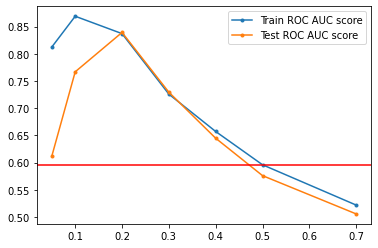

In [20]:
obj.plot_score(train_list,test_list,threshold)

#### Generating the feature  importance dataframe for each of the K estimators

In [21]:
feature_importances=pd.DataFrame()
for idx,estimator in enumerate(scores['estimator']):
    ft_estimator=pd.DataFrame({
        'columns order for estimator_{}'.format(idx):Feature_engineering().fit_transform(X).columns,
        'importance_estimator_{}'.format(idx):estimator.steps[1][1].feature_importances_}).sort_values(['importance_estimator_{}'.format(idx)], ascending=False)
    ft_estimator.reset_index(inplace=True,drop=True)
    feature_importances=pd.concat([feature_importances,ft_estimator],axis=1)

In [22]:
feature_importances.head(10)

,columns order for estimator_0,importance_estimator_0,columns order for estimator_1,importance_estimator_1,columns order for estimator_2,importance_estimator_2,columns order for estimator_3,importance_estimator_3,columns order for estimator_4,importance_estimator_4,columns order for estimator_5,importance_estimator_5,columns order for estimator_6,importance_estimator_6,columns order for estimator_7,importance_estimator_7,columns order for estimator_8,importance_estimator_8,columns order for estimator_9,importance_estimator_9
0,duration,0.277608,duration,0.289440,duration,0.279678,duration,0.266780,duration,0.264349,duration,0.264556,duration,0.255759,duration,0.265058,duration,0.254207,duration,0.256453
1,nr.employed,0.163649,nr.employed,0.162125,nr.employed,0.154816,nr.employed,0.152964,nr.employed,0.157283,nr.employed,0.151718,nr.employed,0.157340,nr.employed,0.156136,nr.employed,0.169848,nr.employed,0.144622
2,euribor3m,0.112667,euribor3m,0.115865,euribor3m,0.120357,euribor3m,0.128679,euribor3m,0.125016,euribor3m,0.133321,euribor3m,0.128219,euribor3m,0.128944,euribor3m,0.126185,euribor3m,0.127872
3,pdays,0.085419,pdays,0.080539,pdays,0.096813,pdays,0.093510,pdays,0.095549,pdays,0.085659,pdays,0.095668,pdays,0.081283,pdays,0.092767,pdays,0.100296
4,emp.var.rate,0.063285,cons.conf.idx,0.064993,cons.conf.idx,0.063825,emp.var.rate,0.063848,cons.conf.idx,0.070083,cons.conf.idx,0.065863,poutcome_success,0.065532,poutcome_success,0.066981,cons.conf.idx,0.067131,emp.var.rate,0.066448
5,cons.conf.idx,0.060478,poutcome_success,0.058114,emp.var.rate,0.062156,cons.conf.idx,0.062659,emp.var.rate,0.061162,poutcome_success,0.060994,cons.conf.idx,0.063316,cons.conf.idx,0.063599,emp.var.rate,0.063453,cons.conf.idx,0.063718
6,poutcome_success,0.058916,emp.var.rate,0.054714,poutcome_success,0.056411,poutcome_success,0.062210,poutcome_success,0.054936,emp.var.rate,0.060182,emp.var.rate,0.060058,emp.var.rate,0.058197,poutcome_success,0.060534,poutcome_success,0.061553
7,cons.price.idx,0.037323,cons.price.idx,0.044576,cons.price.idx,0.035552,cons.price.idx,0.039962,cons.price.idx,0.040677,cons.price.idx,0.039179,cons.price.idx,0.036080,cons.price.idx,0.043386,cons.price.idx,0.035199,cons.price.idx,0.042074
8,previous,0.020138,poutcome_nonexistent,0.018858,poutcome_nonexistent,0.017510,age,0.018973,previous,0.018403,previous,0.019676,previous,0.019798,poutcome_nonexistent,0.019705,previous,0.019069,previous,0.020641
9,age,0.017024,previous,0.016835,age,0.016586,poutcome_nonexistent,0.015299,poutcome_nonexistent,0.016932,poutcome_nonexistent,0.017334,poutcome_nonexistent,0.016300,previous,0.017660,age,0.015227,age,0.018922


<blockquote>Enter specific columns obtained from feature importance dataframe and train the model on them.
<p>In this case we find the columns 'pdays', 'duration', 'euribor3m', 'cons.conf.idx', 'nr.employed' as the most important features</p></blockquote>

In [23]:
data=pd.read_csv('bank-additional-full.csv',sep=';')
y=Feature_engineering.transform_y(data.iloc[:,-1])
imp_cols=['pdays','duration','euribor3m','cons.conf.idx','nr.employed'] #columns obtained from feature importances
X=data.loc[:,imp_cols]
scores=random_forest_pipeline(X,y)

Mean training ROC AUC score:  0.6898457971188521  and mean testing ROC AUC score:  0.6829390088032005
Mean training accuracy score:  0.9139231531588564  and mean testing accuracy score:  0.9114791308735114
Mean training recall score:  0.4005986590038314  and mean testing recall score:  0.38793103448275856
Mean training precision score:  0.7091834662469677  and mean testing precision score:  0.6924859828756309
Mean training f1 score:  0.5114896909042359  and mean testing f1 score:  0.4964042471037581


### Strarified K fold Cross-validation on already fitted pipeline of Random Forest with flexible threshold and chosen fields


In [24]:
class K_Fold_score():
    
    def func_predict_proba(self,X,y,threshold,scores,idx):
        predicted_proba=scores['estimator'][idx].predict_proba(Feature_engineering().fit_transform(X))
        predicted = (predicted_proba[:,1] >= threshold).astype('int')
        roc_auc=roc_auc_score(y,predicted)
        f1=f1_score(y,predicted)
        recall=recall_score(y,predicted)
        accuracy=accuracy_score(y,predicted)
        return roc_auc

    def score_iter(self,X,y,scores,threshold):

        cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        train_score=0
        test_score=0
        for idx,estimator in enumerate(scores['estimator']):
            train_score_iter=0
            test_score_iter=0
            for train_idx,test_idx in cv.split(X, y):

                train_score_iter = train_score_iter +self.func_predict_proba(X.iloc[train_idx],y.iloc[train_idx],threshold,scores,idx)
                test_score_iter  = test_score_iter +self.func_predict_proba(X.iloc[test_idx],y.iloc[test_idx],threshold,scores,idx)

            train_score_iter /=len(scores['estimator'])
            test_score_iter /=len(scores['estimator'])
            
            train_score=train_score+train_score_iter
            test_score=test_score+test_score_iter
        
        train_score/=len(scores['estimator'])
        test_score/=len(scores['estimator'])
        return train_score,test_score
    
    def plot_score(self,train_list,test_list,threshold):
        plt.plot(threshold,train_list, label = "Train ROC AUC score",marker=".")
        plt.plot(threshold,test_list, label = "Test ROC AUC score",marker=".")
        plt.axhline(y=train_list[5], color='r', linestyle='-')
        plt.legend()
        plt.show()


In [25]:
obj= K_Fold_score()

In [26]:
start_time = time.time()        
threshold=[0.05,0.1,0.2,0.3,0.4,0.5,0.7]
train_list=[]
test_list=[]
for i in threshold:
    train_score,test_score=obj.score_iter(X,y,scores,i)
    train_list.append(train_score)
    test_list.append(test_score)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

--- Time of execution is 166.47174525260925 seconds ---


#### Threshold vs Accuracy plot

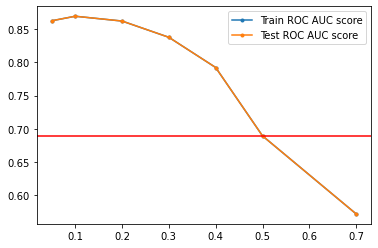

In [27]:
obj.plot_score(train_list,test_list,threshold)

<center><b>Note:</b> We see an improvement in training score and testing score on using those specific columns and flexible threshold</center>

### Stratified K-fold CV on Pipeline including Feature Engineering, SMOTE , Undersampling and Random Forest


In [28]:
def random_forest_pipeline(X,y):
    from imblearn.pipeline import Pipeline

    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.5)
    pipeline = Pipeline([('Pre-processing',Feature_engineering()),('over', over),('under', under),('forest',RandomForestClassifier(n_estimators=50,random_state=42,max_depth=5))])
    pipeline = pipeline.fit(X,y)
    scores = cross_validate(pipeline,X,y,cv=10,scoring=scoring,return_train_score=True,return_estimator =True)
    
    accuracy_measures(scores)
    return scores

Initially, use all the columns to fit the model

In [29]:
data=pd.read_csv('bank-additional-full.csv',sep=';')

X=data.iloc[:,:-1]
y=Feature_engineering.transform_y(data.iloc[:,-1])
scores=random_forest_pipeline(X,y)

C:\Users\surta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean training ROC AUC score:  0.7708791730497906  and mean testing ROC AUC score:  0.558973024053246
Mean training accuracy score:  0.8967093375244787  and mean testing accuracy score:  0.7340582283666082
Mean training recall score:  0.6084530651340996  and mean testing recall score:  0.3329741379310345
Mean training precision score:  0.5536779661104976  and mean testing precision score:  0.23813134337384248
Mean training f1 score:  0.5727891507473657  and mean testing f1 score:  0.14873257803671655


<u>To deal with class imbalance , we oversample the minority class and undersampling the majority class</u>

#### Generating the feature importance dataframe for each of the K estimators

In [30]:
feature_importances=pd.DataFrame()
for idx,estimator in enumerate(scores['estimator']):
    ft_estimator=pd.DataFrame({
        'columns order for estimator_{}'.format(idx):Feature_engineering().fit_transform(X).columns,
        'importance_estimator_{}'.format(idx):estimator.steps[3][1].feature_importances_}).sort_values(['importance_estimator_{}'.format(idx)], ascending=False)
    ft_estimator.reset_index(inplace=True,drop=True)
    feature_importances=pd.concat([feature_importances,ft_estimator],axis=1)

In [31]:
feature_importances.head()

,columns order for estimator_0,importance_estimator_0,columns order for estimator_1,importance_estimator_1,columns order for estimator_2,importance_estimator_2,columns order for estimator_3,importance_estimator_3,columns order for estimator_4,importance_estimator_4,columns order for estimator_5,importance_estimator_5,columns order for estimator_6,importance_estimator_6,columns order for estimator_7,importance_estimator_7,columns order for estimator_8,importance_estimator_8,columns order for estimator_9,importance_estimator_9
0,duration,0.250597,duration,0.243983,duration,0.234789,duration,0.261250,duration,0.223412,duration,0.295962,duration,0.304962,duration,0.249889,duration,0.301963,duration,0.210650
1,nr.employed,0.146482,emp.var.rate,0.140261,nr.employed,0.159983,nr.employed,0.169838,nr.employed,0.181245,euribor3m,0.136846,emp.var.rate,0.131665,euribor3m,0.127457,emp.var.rate,0.173451,nr.employed,0.158732
2,emp.var.rate,0.129937,nr.employed,0.140001,euribor3m,0.122514,euribor3m,0.121791,euribor3m,0.116682,nr.employed,0.102288,nr.employed,0.117915,emp.var.rate,0.117706,euribor3m,0.115368,euribor3m,0.147933
3,euribor3m,0.113665,euribor3m,0.099850,emp.var.rate,0.107550,emp.var.rate,0.081084,emp.var.rate,0.089143,emp.var.rate,0.079699,euribor3m,0.077081,nr.employed,0.100868,nr.employed,0.082870,emp.var.rate,0.139606
4,pdays,0.068946,pdays,0.073015,cons.conf.idx,0.074264,pdays,0.078334,pdays,0.079559,pdays,0.078794,pdays,0.075907,cons.conf.idx,0.074001,pdays,0.058314,cons.conf.idx,0.097908


<blockquote>Enter specific columns obtained from feature importance dataframe and train the model on them.
<p>In this case we find the columns 'pdays','duration','euribor3m','cons.conf.idx','nr.employed' as the most important features</p></blockquote>

In [32]:
data=pd.read_csv('bank-additional-full.csv',sep=';')
data=data[~data.duplicated()] #removing duplicate rows

y=Feature_engineering.transform_y(data.iloc[:,-1])
imp_cols=['pdays','duration','euribor3m','cons.conf.idx','nr.employed'] #columns obtained from feature importances
X=data.loc[:,imp_cols]
scores=random_forest_pipeline(X,y)

Mean training ROC AUC score:  0.8761448678072146  and mean testing ROC AUC score:  0.574410905173271
Mean training accuracy score:  0.8934546325012052  and mean testing accuracy score:  0.7100291285626366
Mean training recall score:  0.8538002443389082  and mean testing recall score:  0.39936974007596626
Mean training precision score:  0.5182416942534752  and mean testing precision score:  0.26296593149040437
Mean training f1 score:  0.6443519810373807  and mean testing f1 score:  0.2272920926549297


### Strarified K fold Cross-validation on already fitted pipeline of Feature Engineering, SMOTE,Random Undersampling, Random Forest with flexible threshold and chosen fields


In [33]:
class K_Fold_score():
    
    def func_predict_proba(self,X,y,threshold,scores,idx):
        predicted_proba=scores['estimator'][idx].predict_proba(Feature_engineering().fit_transform(X))
        predicted = (predicted_proba[:,1] >= threshold).astype('int')
        roc_auc=roc_auc_score(y,predicted)
        f1=f1_score(y,predicted)
        recall=recall_score(y,predicted)
        accuracy=accuracy_score(y,predicted)
        return roc_auc

    def score_iter(self,X,y,scores,threshold):

        cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        train_score=0
        test_score=0
        for idx,estimator in enumerate(scores['estimator']):
            train_score_iter=0
            test_score_iter=0
            for train_idx,test_idx in cv.split(X, y):

                train_score_iter = train_score_iter +self.func_predict_proba(X.iloc[train_idx],y.iloc[train_idx],threshold,scores,idx)
                test_score_iter  = test_score_iter +self.func_predict_proba(X.iloc[test_idx],y.iloc[test_idx],threshold,scores,idx)

            train_score_iter /=len(scores['estimator'])
            test_score_iter /=len(scores['estimator'])
            
            train_score=train_score+train_score_iter
            test_score=test_score+test_score_iter
        
        train_score/=len(scores['estimator'])
        test_score/=len(scores['estimator'])
        return train_score,test_score
    
    def plot_score(self,train_list,test_list,threshold):
        plt.plot(threshold,train_list, label = "Train ROC AUC score",marker=".")
        plt.plot(threshold,test_list, label = "Test ROC AUC score",marker=".")
        plt.axhline(y=train_list[5], color='r', linestyle='-')
        plt.legend()
        plt.show()


In [34]:
obj= K_Fold_score()

In [35]:
start_time = time.time()        
threshold=[0.05,0.1,0.2,0.3,0.4,0.5,0.7]
train_list=[]
test_list=[]
for i in threshold:
    train_score,test_score=obj.score_iter(X,y,scores,i)
    train_list.append(train_score)
    test_list.append(test_score)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

--- Time of execution is 103.16607189178467 seconds ---


#### Threshold vs Accuracy plot

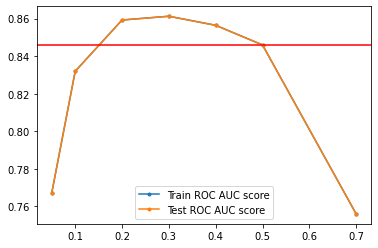

In [36]:
obj.plot_score(train_list,test_list,threshold)

<center><b>Note:</b> We see an improvement in training score and testing score on using those specific columns</center>

### Strarified K fold Cross-validation on Pipeline including  Feature Engineering and Naive Bayes

In [37]:
def naive_bayes_pipeline(X,y):
    cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    pipeline = Pipeline([('Pre-processing',Feature_engineering()),('Naive Bayes',GaussianNB())])
    scores = cross_validate(pipeline,X,y,cv=cv,scoring=scoring,return_train_score=True,return_estimator=True)
    
    accuracy_measures(scores)
    return scores

In [38]:
start_time = time.time()

data=pd.read_csv('bank-additional-full.csv',sep=';')
data=data[~data.duplicated()] #removing duplicate rows

X=data.iloc[:,:-1]
y=Feature_engineering.transform_y(data.iloc[:,-1])
scores=naive_bayes_pipeline(X,y)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

Mean training ROC AUC score:  0.7129325171022405  and mean testing ROC AUC score:  0.7119821473863999
Mean training accuracy score:  0.8641090852364657  and mean testing accuracy score:  0.8639258524015198
Mean training recall score:  0.5177840296418658  and mean testing recall score:  0.5158435428613986
Mean training precision score:  0.41698465310531585  and mean testing precision score:  0.41622323001370215
Mean training f1 score:  0.4619444637157592  and mean testing f1 score:  0.46069696220166423
--- Time of execution is 3.1206648349761963 seconds ---


### Stratified K-fold CV on Pipeline inclduing Feature Engineering, SMOTE , Undersampling and Naive Bayes

In [39]:
def naive_bayes_pipeline(X,y):
    from imblearn.pipeline import Pipeline

    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.6)
    pipeline = Pipeline([('Pre-processing',Feature_engineering()),('over', over),('under', under),('Naive Bayes',GaussianNB())])
    pipeline = pipeline.fit(X,y)
    scores = cross_validate(pipeline,X,y,cv=10,scoring=scoring,return_train_score=True,return_estimator =True)
    
    accuracy_measures(scores)
    return scores

In [40]:
start_time = time.time()

data=pd.read_csv('bank-additional-full.csv',sep=';')
data=data[~data.duplicated()] #removing duplicate rows

X=data.iloc[:,:-1]
y=Feature_engineering.transform_y(data.iloc[:,-1])
scores=naive_bayes_pipeline(X,y)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

Mean training ROC AUC score:  0.7352568919369111  and mean testing ROC AUC score:  0.6180120975871157
Mean training accuracy score:  0.8532586256818162  and mean testing accuracy score:  0.7421825046246253
Mean training recall score:  0.5829326691444696  and mean testing recall score:  0.45771440008937214
Mean training precision score:  0.40197712473531366  and mean testing precision score:  0.4154331912004078
Mean training f1 score:  0.4731640584515315  and mean testing f1 score:  0.2880747521044092
--- Time of execution is 8.714720726013184 seconds ---
